In [40]:
#Import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [1]:
!unzip "/content/drive/MyDrive/Deep Learning/lstm.zip"

Archive:  /content/drive/MyDrive/Deep Learning/lstm.zip
  inflating: lstm/Google_Stock_Price_Test.csv  
  inflating: lstm/Google_Stock_Price_Train.csv  


In [42]:
# reading the data 

training_data = pd.read_csv('/content/lstm/Google_Stock_Price_Test.csv')

# checking the shape of the data
training_data.shape

(20, 6)

In [43]:
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [44]:
training_data.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [45]:
# Lets work on the open stock price only and take out the " open " stock column.

training_data = training_data.iloc[:, 1:2]

# The training_data is in the form of dataframe.
training_data.shape

(20, 1)

In [46]:
# checking the head of the data

training_data.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


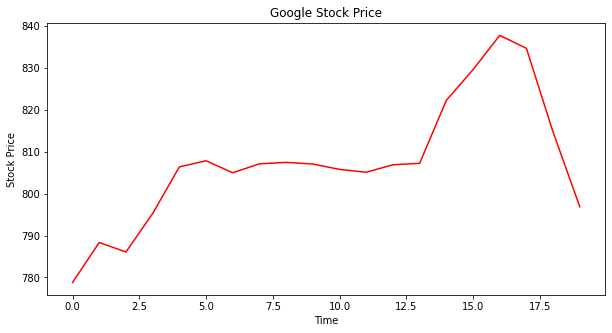

In [47]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,5))
plt.plot(training_data, color ='red');
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.show()

In [48]:
# Normalize the training data between [0,1]
from sklearn.preprocessing import MinMaxScaler
#the fit method, when applied to the training dataset, learns the model parameters (for example, mean and standard deviation). 
#We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset.
#We could also perform both of this step in one step by applying fit_transform on the training dataset.
mm = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = mm.fit_transform(training_data)
training_data_scaled.shape

(20, 1)

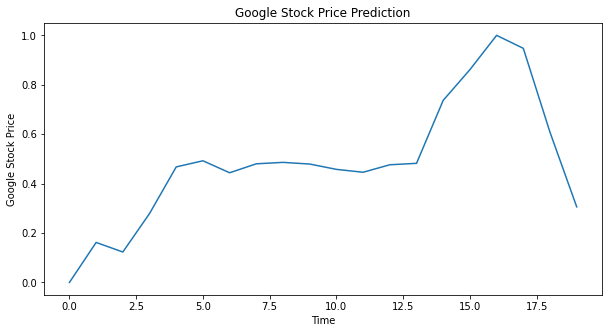

In [49]:
plt.figure(figsize=(10,5))
plt.plot(training_data_scaled);
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

In [53]:
# Getting the inputs and outputs directly if you know how to consider the past data for the number of time stamps needed for RNN.
x_train = training_data_scaled[0:19]
y_train = training_data_scaled[1:20]
print(x_train.shape)
print(y_train.shape)

(19, 1)
(19, 1)


In [55]:
# reshaping
x_train = np.reshape(x_train, (19,1,1))
print(x_train.shape)

(19, 1, 1)


In [56]:
import keras 
from keras.models import Sequential #helps to create model, layer by layer.
from keras.layers import Dense, LSTM, Dropout

In [57]:
# Create model using LSTM, Dropout and Dense layer as an output layer. 
#Initializing the RNN
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [58]:
# Adding second hidden layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [59]:
# Adding third hidden layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [60]:
#Adding fourth hidden layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [61]:
# Adding dense layer to get the final output. The input of n-1 layer, will be the output for n layer.
regressor.add(Dense(units = 1))

In [62]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [63]:
# Train the model
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.3151
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3113
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3075
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3038
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3000
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2963
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2915
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2879
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2833
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2790
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2743
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2705
Epoch 13/100
1/1 [==============================] -

In [64]:
test_data = pd.read_csv('/content/lstm/Google_Stock_Price_Test.csv')
test_stock = test_data.iloc[:,1:2]
len(test_stock)

20

In [65]:
input_value = test_stock
input_value = mm.transform(input_value)
# perfor the same process, converting a 2D array to 3D
input_value = np.reshape(input_value, (20, 1, 1))

In [66]:
prediction = regressor.predict(input_value)
prediction = mm.inverse_transform(prediction)

1/1 [==============================] - 2s 2s/step


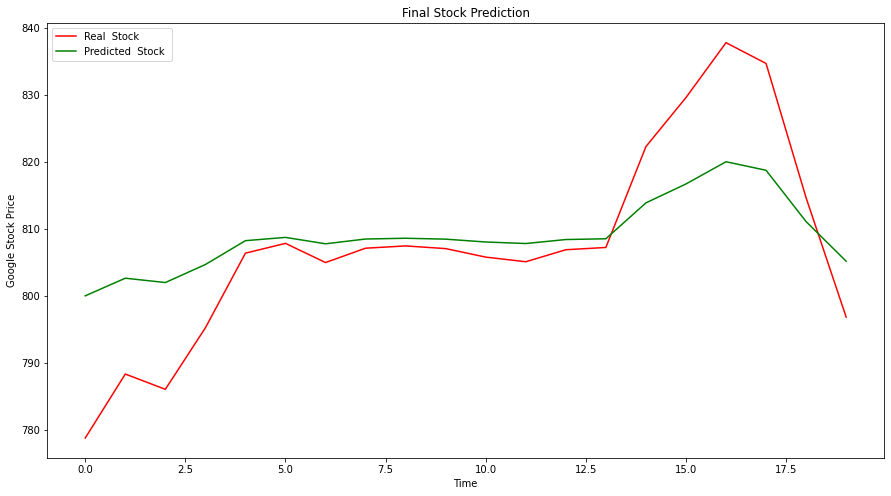

In [67]:
# visualizing the results

plt.rcParams['figure.figsize'] = (15, 8)

plt.plot(test_stock, color = 'red', label = 'Real  Stock ')
plt.plot(prediction, color = 'green', label = 'Predicted  Stock ')
plt.title('Final Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
